In [1]:
#import the needed packages
import pandas as pd

#read the data
df = pd.read_csv('/content/drive/MyDrive/data colab/Daily_Attendance.csv')
Daily_Attendance = df
Daily_Attendance

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172,19,153,0
1,01M015,20180906,171,17,154,0
2,01M015,20180907,172,14,158,0
3,01M015,20180912,173,7,166,0
4,01M015,20180913,173,9,164,0
...,...,...,...,...,...,...
277148,79X695,20190620,230,46,136,48
277149,79X695,20190621,226,53,128,45
277150,79X695,20190624,226,42,130,54
277151,79X695,20190625,226,56,127,43


In [2]:
#to check how many missing value
Daily_Attendance.isnull().mean()

School DBN    0.0
Date          0.0
Enrolled      0.0
Absent        0.0
Present       0.0
Released      0.0
dtype: float64

In [4]:
import pandas as pd
import numpy as np
from scipy import stats


# Select columns where you want to identify outliers
columns = ['Enrolled', 'Absent', 'Present', 'Released']

# Using IQR method to identify and remove outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

# Verify the result
print(df_no_outliers.describe())

# Save the cleaned data to a new CSV file
df_no_outliers.to_csv('cleaned_school_data.csv', index=False)


               Date       Enrolled         Absent        Present  Released
count  2.216180e+05  221618.000000  221618.000000  221618.000000  221618.0
mean   2.018646e+07     487.746740      38.127887     449.618853       0.0
std    4.588367e+03     237.027609      22.498884     230.467895       0.0
min    2.018090e+07       1.000000       0.000000       1.000000       0.0
25%    2.018111e+07     311.000000      21.000000     281.000000       0.0
50%    2.019012e+07     441.000000      34.000000     403.000000       0.0
75%    2.019041e+07     619.000000      51.000000     577.000000       0.0
max    2.019063e+07    1216.000000     113.000000    1163.000000       0.0


### **Summarize**

In [5]:
import pandas as pd
#To calculate the total attendance for each school,
#we'll group the data by the "School DBN" column and sum up
#the "Enrolled," "Absent," "Present," and "Released" columns for each school.
# This will give us the total attendance statistics for each school in your dataset.

# Group by 'School DBN' and calculate the sum for each group
df_no_outliers = df.groupby('School DBN').sum().reset_index()

# Display the total attendance for each school
print(df_no_outliers[['School DBN', 'Enrolled', 'Absent', 'Present', 'Released']])

     School DBN  Enrolled  Absent  Present  Released
0        01M015     30908    2278    28609        21
1        01M019     44994    3979    40744       271
2        01M020     85674    6804    78870         0
3        01M034     54900    6309    48554        37
4        01M063     40873    3731    37111        31
...         ...       ...     ...      ...       ...
1578     75X754     85952   32644    51084      2224
1579     75X811    113393   18753    93554      1086
1580     79M331      3735    2257     1478         0
1581     79Q344     41856   26332    12371      3153
1582     79X695     40288    9425    29818      1045

[1583 rows x 5 columns]


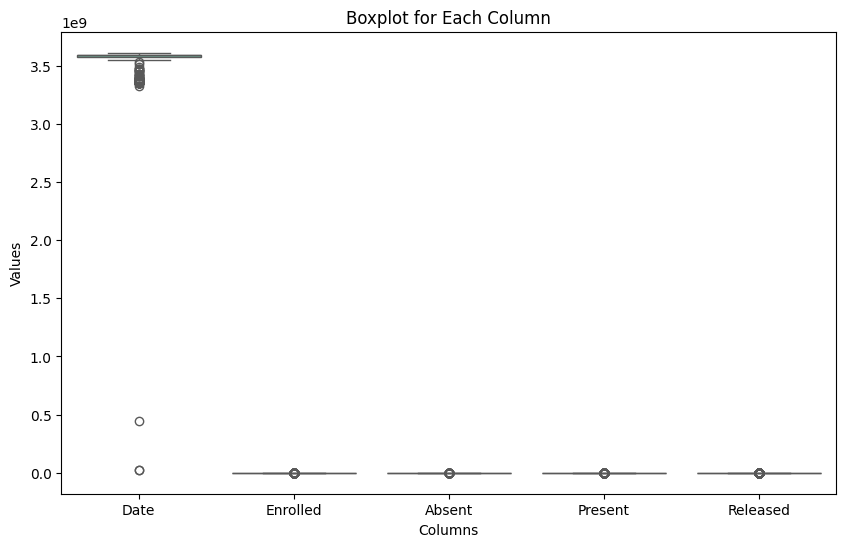

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create boxplots for each column using seaborn
sns.boxplot(data=df_no_outliers
            , orient='v', palette='Set2')

# Set plot labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for Each Column')

# Show the plot
plt.show()
